Welcome to the 4th part of NLP Concept Series. We have covered lots of things but we still have lot more to cover. In this notebook, we will start with Name Entity Recognition (NER) then we will continue with the Recurrent Neural Networks (RNN).

# NER

NER is an NLP task in which the model labels the words or fhrasesas person, location, organization etc. Currently, this is one of the most successful NLP task, we can apply so far. We will see the reason in a bit.

Let's build a baseline algorithm for this task (I'll use the same baseline model in the book):

>If the given word is ambiguous:

>$\hspace{0.5cm}$ Choose the most frequent tag in the training corpus.

The success rate of this algorithm is 92%. Therefore, it is not suprising that a more comprehensive model have an accuracy rate of 97-98%.

The book covers two tagging methods. The links will direct the reader to the mathematical explanations that I have prepared.

1. Hidden Markov Models (HMM) [(Link)](https://github.com/egonos/NLP-Concepts/blob/main/Images/HMM%20Decoding.jpg)
2. Conditional Random Fields (CRF) [(Link)](https://github.com/egonos/NLP-Concepts/blob/main/Images/CRF.jpg)


Now, let's shift our attention more on th practical side. We can use several modules for tagging. I'll provide a couple of them:



In [1]:
import textblob
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##TextBlob

In [2]:
sentence = "Mr and Mrs Dursley, of number four, Privet Drive, were proud to say \
that they were perfectly normal, thank you very much. They \
were the last people you’d expect to be involved in anything \
strange or mysterious, because they just didn’t hold with such \
nonsense."

text = textblob.TextBlob(sentence)
print(text.tags)

[('Mr', 'NNP'), ('and', 'CC'), ('Mrs', 'NNP'), ('Dursley', 'NNP'), ('of', 'IN'), ('number', 'NN'), ('four', 'CD'), ('Privet', 'NNP'), ('Drive', 'NNP'), ('were', 'VBD'), ('proud', 'JJ'), ('to', 'TO'), ('say', 'VB'), ('that', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('perfectly', 'RB'), ('normal', 'JJ'), ('thank', 'NN'), ('you', 'PRP'), ('very', 'RB'), ('much', 'RB'), ('They', 'PRP'), ('were', 'VBD'), ('the', 'DT'), ('last', 'JJ'), ('people', 'NNS'), ('you', 'PRP'), ('’', 'VBP'), ('d', 'JJ'), ('expect', 'VBP'), ('to', 'TO'), ('be', 'VB'), ('involved', 'VBN'), ('in', 'IN'), ('anything', 'NN'), ('strange', 'JJ'), ('or', 'CC'), ('mysterious', 'JJ'), ('because', 'IN'), ('they', 'PRP'), ('just', 'RB'), ('didn', 'VBP'), ('’', 'JJ'), ('t', 'NN'), ('hold', 'NN'), ('with', 'IN'), ('such', 'JJ'), ('nonsense', 'NN')]


##NLTK

In [3]:
sentence = "Mr and Mrs Dursley, of number four, Privet Drive, were proud to say \
that they were perfectly normal, thank you very much. They \
were the last people you’d expect to be involved in anything \
strange or mysterious, because they just didn’t hold with such \
nonsense."

tokenized_sentence = nltk.word_tokenize(sentence)
print(nltk.pos_tag(tokenized_sentence))

[('Mr', 'NNP'), ('and', 'CC'), ('Mrs', 'NNP'), ('Dursley', 'NNP'), (',', ','), ('of', 'IN'), ('number', 'NN'), ('four', 'CD'), (',', ','), ('Privet', 'NNP'), ('Drive', 'NNP'), (',', ','), ('were', 'VBD'), ('proud', 'JJ'), ('to', 'TO'), ('say', 'VB'), ('that', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('perfectly', 'RB'), ('normal', 'JJ'), (',', ','), ('thank', 'NN'), ('you', 'PRP'), ('very', 'RB'), ('much', 'RB'), ('.', '.'), ('They', 'PRP'), ('were', 'VBD'), ('the', 'DT'), ('last', 'JJ'), ('people', 'NNS'), ('you', 'PRP'), ('’', 'VBP'), ('d', 'JJ'), ('expect', 'VBP'), ('to', 'TO'), ('be', 'VB'), ('involved', 'VBN'), ('in', 'IN'), ('anything', 'NN'), ('strange', 'JJ'), ('or', 'CC'), ('mysterious', 'JJ'), (',', ','), ('because', 'IN'), ('they', 'PRP'), ('just', 'RB'), ('didn', 'VBP'), ('’', 'JJ'), ('t', 'NN'), ('hold', 'NN'), ('with', 'IN'), ('such', 'JJ'), ('nonsense', 'NN'), ('.', '.')]


## Transformer


Transformers can be fine-tuned for NER.

In [4]:
! pip install transformers

# ref: https://huggingface.co/51la5/roberta-large-NER
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-large-finetuned-conll03-english")
model = AutoModelForTokenClassification.from_pretrained("xlm-roberta-large-finetuned-conll03-english")
classifier = pipeline("ner", model=model, tokenizer=tokenizer)

sentence = "Mr and Mrs Dursley, of number four, Privet Drive, were proud to say \
that they were perfectly normal, thank you very much. They \
were the last people you’d expect to be involved in anything \
strange or mysterious, because they just didn’t hold with such \
nonsense."

ner_results = classifier(sentence)
print(ner_results)

Some weights of the model checkpoint at xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-PER', 'score': 0.99999106, 'index': 4, 'word': '▁Dur', 'start': 11, 'end': 14}, {'entity': 'I-PER', 'score': 0.99996054, 'index': 5, 'word': 's', 'start': 14, 'end': 15}, {'entity': 'I-PER', 'score': 0.99997115, 'index': 6, 'word': 'ley', 'start': 15, 'end': 18}, {'entity': 'I-LOC', 'score': 0.9886058, 'index': 12, 'word': '▁Pri', 'start': 36, 'end': 39}, {'entity': 'I-LOC', 'score': 0.9981232, 'index': 13, 'word': 'vet', 'start': 39, 'end': 42}, {'entity': 'I-LOC', 'score': 0.9921381, 'index': 14, 'word': '▁Drive', 'start': 43, 'end': 48}]


# Recurrent Neural Networks

**Why do we need RNN's?**

Think about a feed forward neural network (FFN). Let's say out model tries to find the next word using the previous ones. Since our memory and computational capacities are limited, we need to use n-grams:

$x_{n+1} = f(x_1,x_2,x_3...x_n)$ where $f$ is the mapping function that FFN uses.

This can raise the term called *limited context problem*. As we can only use n-prior words to predict the next one, the prediction usually becomes insufficient. In RNN, the weights are updated in each timestep in such a way that from beginning to end all the words  contribute to the final outcome (we will see how works).

**The structure of RNN**

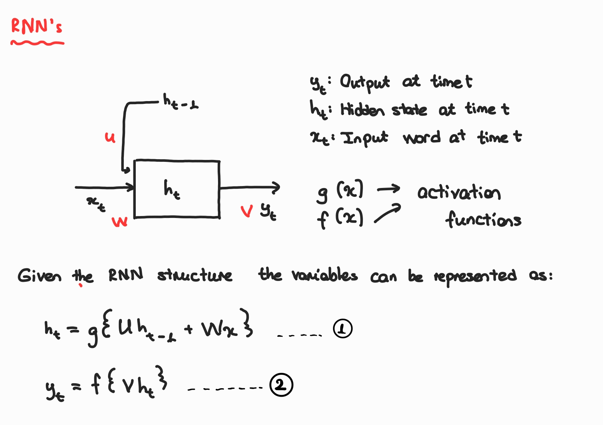


&nbsp;

## Training RNN

The probability of next word being $i$ is:

&nbsp;

$P(w_{t+1} = i | w_1,w_2....w_t)$

In RNN's the equation above is represented as $y[i]$.

&nbsp;

As sequence proceeds, weights are updated via *backpropagation*. The gradients are determined based on the alignment with the prediction probabilities and the next. How to measure this alignment? As always, cross entropy loss:

&nbsp;

$L_{CE} = - ∑y_t[w]*log(ŷ_t[w])$

 where $w$ is the word itself.





## Coding RNN for Text Generation

In practice, the text generation task consists the following steps:

1. Create mapping functions (both ids from characters and characters from ids).
2. Convert characters to ids and split the data like in the sliding windows.
3. Create a model to train.
4. Let the model generate text for you.

I'm preparing this part utilizing the [text generation guide](https://www.tensorflow.org/text/tutorials/text_generation?hl=tr#download_the_shakespeare_dataset) published by Tensorflow. It is similar to that work, but I tried to explain each step as much as I could to ease up the learning process.

In [5]:
#import the libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [6]:
#download the data from the source
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

#open and read the data
with open(path_to_file,'rb') as f:
  lines = f.read().decode(encoding='utf-8')
f.close()

#see how it looks like
print(lines[:250])

1115394/1115394 [==============================] - 0s 0us/step
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [7]:
#remove the newline characters
lines = lines.replace('\n',' ')

In [8]:
#reduce the text into the letters using a set variable
letters = sorted(set(lines))

In [9]:
#create char -> id mapping
ids_from_chars = tf.keras.layers.StringLookup(vocabulary = list(letters))

#encode the characters and see how its look like
ids = ids_from_chars(letters)
ids

<tf.Tensor: shape=(64,), dtype=int64, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])>

In [10]:
#create id -> char mapping by using invert = True hyperparameter of StringLookup
chars_from_ids = tf.keras.layers.StringLookup(vocabulary = letters, invert = True)

#decode the ids
chars = chars_from_ids(ids)
chars

<tf.Tensor: shape=(64,), dtype=string, numpy=
array([b' ', b'!', b'$', b'&', b"'", b',', b'-', b'.', b'3', b':', b';',
       b'?', b'A', b'B', b'C', b'D', b'E', b'F', b'G', b'H', b'I', b'J',
       b'K', b'L', b'M', b'N', b'O', b'P', b'Q', b'R', b'S', b'T', b'U',
       b'V', b'W', b'X', b'Y', b'Z', b'a', b'b', b'c', b'd', b'e', b'f',
       b'g', b'h', b'i', b'j', b'k', b'l', b'm', b'n', b'o', b'p', b'q',
       b'r', b's', b't', b'u', b'v', b'w', b'x', b'y', b'z'], dtype=object)>

Now, we will define a function that directly takes the outputs of the model, converts the outpus into the letters again and join them.

In [11]:
#a function for joining the characters
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis = -1)

In [12]:
#split the lines into characters and encode them using char -> id mapping function
encoded_text = ids_from_chars(tf.strings.unicode_split(lines, 'UTF-8'))
encoded_text

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([18, 47, 56, ..., 45,  8,  1])>

In [13]:
#create a custom tensoflow dataset
ids_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)

After defining the sequence length to calculate the examples per epoch we will devide sequence_length + 1. This +1 comes from the character to predict.

In [14]:
SEQ_LENGTH = 100
example_per_epoch = len(lines)//(SEQ_LENGTH+1)

In [15]:
#create sequences automatically by batching the dataset
sequences = ids_dataset.batch(SEQ_LENGTH+1,drop_remainder = True) #drop_remainder drops the residual characters that couldn't complete the sequence length

In [16]:
#see how it looks like
for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b' ' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b' ' b' ' b'A' b'l' b'l' b':' b' ' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b' ' b' ' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b' ' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [17]:
#see how it looks like
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen: Before we proceed any further, hear me speak.  All: Speak, speak.  First Citizen: You '
b'are all resolved rather to die than to famish?  All: Resolved. resolved.  First Citizen: First, you k'
b"now Caius Marcius is chief enemy to the people.  All: We know't, we know't.  First Citizen: Let us ki"
b"ll him, and we'll have corn at our own price. Is't a verdict?  All: No more talking on't; let it be d"
b'one: away, away!  Second Citizen: One word, good citizens.  First Citizen: We are accounted poor citi'


By using `map()` method of `tf.dataset`, we can group the characters to training and predicting.

In [18]:
#defining a function for map()
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text,target_text

In [19]:
#apply the function to the tf dataset
dataset = sequences.map(split_input_target)

#get samples
for input_text, target_text in dataset.take(1):
  print(input_text)
  print(target_text)

tf.Tensor(
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  1 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  1  1 13 50 50 10  1 31 54 43 39 49
  6  1 57 54 43 39 49  8  1  1 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  1 37 53 59], shape=(100,), dtype=int64)
tf.Tensor(
[47 56 57 58  1 15 47 58 47 64 43 52 10  1 14 43 44 53 56 43  1 61 43  1
 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43 39
 56  1 51 43  1 57 54 43 39 49  8  1  1 13 50 50 10  1 31 54 43 39 49  6
  1 57 54 43 39 49  8  1  1 18 47 56 57 58  1 15 47 58 47 64 43 52 10  1
 37 53 59  1], shape=(100,), dtype=int64)


Let's do the same thing after reverting the characters back.

In [20]:
for input_text, target_text in dataset.take(1):
  print(text_from_ids(input_text).numpy())
  print(text_from_ids(target_text).numpy())

b'First Citizen: Before we proceed any further, hear me speak.  All: Speak, speak.  First Citizen: You'
b'irst Citizen: Before we proceed any further, hear me speak.  All: Speak, speak.  First Citizen: You '


In [21]:
#prepare the dataset for optimal performance
dataset = dataset.shuffle(1000).batch(64).prefetch(tf.data.AUTOTUNE)

In [22]:
#copy from the source
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

# Length of the vocabulary in chars
vocab_size = len(letters)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss)
history = model.fit(dataset, epochs=1)

173/173 [==============================] - 490s 3s/step - loss: 2.6928


## NER with RNN's

Named Entity Recognition using RNN's are pretty similar with the text generation. In text generation the output probabilities are calculated using $|V|$ (vocabulary in the corpus) number of neurons and softmax activation. In sequence labeling, we use tag number of neurons and softmax activation.



## Text Classification Using RNN's

To use RNN's for text classification, we also need to employ a FFN. While building architecture, we have two options:

1. Feeding the hidden state at time $t = t_{n}$ (last time step) to the FFN structure (source: Jurafsky, D., Martin, J. H. (2009). Speech and language processing).

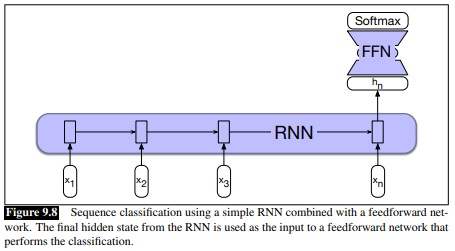

2. Averaging the hidden states from the beginning and feed this average to the FFN:

$h_{avg} = \frac 1 n ∑_{i=1}^n h_i$

In [23]:
#import the libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
NUMBER_OF_WORDS = 1000 #set the number of words to get from the dataset amnually
MAX_LEN = 500 #set the padding length
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = NUMBER_OF_WORDS)

17464789/17464789 [==============================] - 1s 0us/step


In [25]:
#get samples
print(x_train[0])
print(x_train.shape,y_train.shape)

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000,) (25000,)


The words have already been tokenized. All we have to do is to stabilize the dimensions (The reviews have different length, therefore we can not feed them directly to an Embedding layer.). To accomplish this, we can use padding operation.

Padding operation is an attempt for the stabilizing the input dimensions by adding zeros to either beginning or to the end of a sequence.





In [26]:
#we have to equalize the length of the sequences
len(x_train[0]),len(x_train[1])

(218, 189)

In [27]:
#pad training and test sequences
x_train = pad_sequences(x_train,maxlen = MAX_LEN)
x_test = pad_sequences(x_test,maxlen = MAX_LEN)

In [28]:
x_train.shape,x_test.shape

((25000, 500), (25000, 500))

Now our sequences have constant length. Therefore they can be put into an Embedding layer.

In [29]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim = NUMBER_OF_WORDS,output_dim = 32,input_length = MAX_LEN),
    layers.SimpleRNN(units = 32),
    layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,batch_size = 32)

782/782 [==============================] - 90s 114ms/step - loss: 0.6581 - accuracy: 0.6080


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


## Stacked RNN's

We can arrange the configuration of a text classification model different from the previous one to improve the prediction performance.


A common way to build a RNN architecture is to stack a couple of RNN units together.

(source: Jurafsky, D., Martin, J. H. (2009). Speech and language processing)

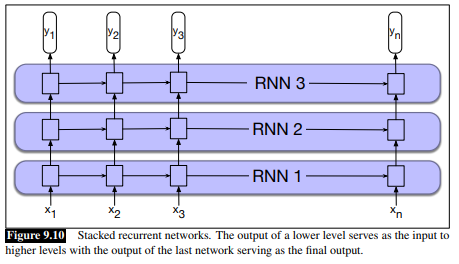

Each member of the stack, gets *all* the hidden states from the previous one `(return_sequences = True)`. This operation generally increases the performance of the model. Similar to the CNN architecture, stacking more than one RNN layers may further improve the abstraction quality.



In [31]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim = NUMBER_OF_WORDS,output_dim = 32,input_length = MAX_LEN),
    layers.SimpleRNN(units = 32,return_sequences = True),
    layers.SimpleRNN(units = 32),
    layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,batch_size = 32)

782/782 [==============================] - 177s 224ms/step - loss: 0.6153 - accuracy: 0.6514


## Bidirectional RNN's

In Bidirectional RNN, instead of one, we are using two RNN structures. One of them is trained as usual (RNN 1) and the other one is trained in reverse (RNN 2).

(source: Jurafsky, D., Martin, J. H. (2009). Speech and language processing)

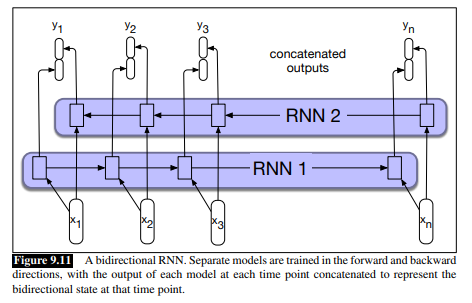

 While training, the hidden output at time t ($h_t$) is calculated by averaging the forward ($h_t^f$) and backward ($h_t^b$) hidden outputs.

$h_t = [h_t^f;h_t^b]$ ($;$ for elementwise averaging)

In [32]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim = NUMBER_OF_WORDS,output_dim = 32,input_length = MAX_LEN),
    layers.Bidirectional(layers.SimpleRNN(units = 32)),
    layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,batch_size = 32)

782/782 [==============================] - 130s 164ms/step - loss: 0.5826 - accuracy: 0.6817


## LSTM

RNNs are prone to suffer from vanishing gradient problem:

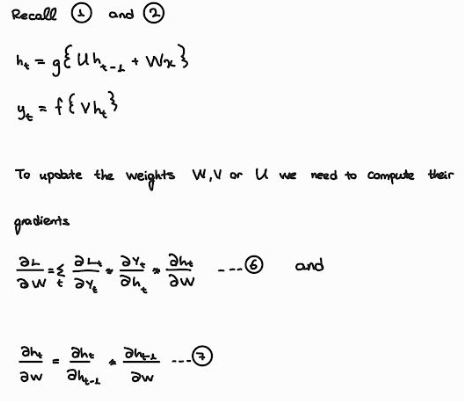

as $t$ increases, to compute $7$, we need to use long chains of derivatives. This causes gradients to vanish. Weights in the early stages are not updated so their contribution in forward pass is not evolving.

Here is the tricky part (at least it was to me while learning): We need *all* $W \& U $ matricies for generating the final output.

LSTM is developed to enhance RNN's capabilities. It has two main duties:

(Rephrasing the following two bullet points directly from the book)

1. Remove the information that is not needed anymore.
2. Adding the information that is likely to be needed in the future.

**Gates** are used for adding and/or removing information from an LSTM cell. They use *sigmoid* activation for this purpose:

1. **Forget Gate:** The goal of the forget gate is to remove the information that is not needed anymore.
2. **Add Gate:** Add gate is used for determining the information to be added to the LSTM cell.
3. **Output Gate:** Output gate selectively picks information that is needed for the current hidden state.

(source: Jurafsky, D., Martin, J. H. (2009). Speech and language processing)

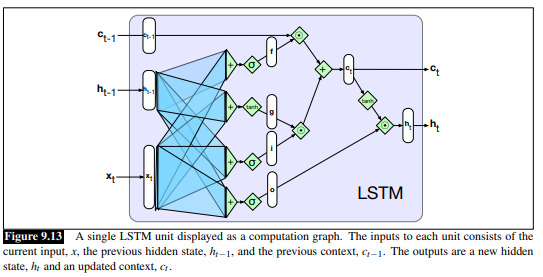

In [33]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim = NUMBER_OF_WORDS,output_dim = 32,input_length = MAX_LEN),
    layers.LSTM(units = 32),
    layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,batch_size = 32)

782/782 [==============================] - 153s 192ms/step - loss: 0.5122 - accuracy: 0.7478


## GRU

GRU is similar to the LSTM but it has a simpler architecture leading to a faster computation.

In [34]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim = NUMBER_OF_WORDS,output_dim = 32,input_length = MAX_LEN),
    layers.GRU(units = 32),
    layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,batch_size = 32)

782/782 [==============================] - 178s 225ms/step - loss: 0.4697 - accuracy: 0.7693


## Encoder Decoder Model with RNN

Encoder - Decoder models are often used for machine translation. They are sometimes called *sequence-to-sequence* models.

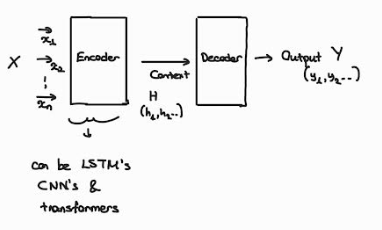


Recall the output joint probability of predicting the next word:

&nbsp;

$P(y|y_1,...y_n) = P(y_1)*P(y_2|y_1)*P(y_3|y_1,y_2)...P(y_m|y_1....y_n)$

&nbsp;

To get an Encoder - Decoder model, all we need to do is to adding a sentence separator $<s>$. Once we get the input sequence $X$, we just need to compute the same probability given $X$:

&nbsp;

$P(y|y_1,...y_n,X) = P(y_1|X)*P(y_2|y_1,X)*P(y_3|y_1,y_2,X)...P(y_m|y_1....y_n,X)$

(source: Jurafsky, D., Martin, J. H. (2009). Speech and language processing)

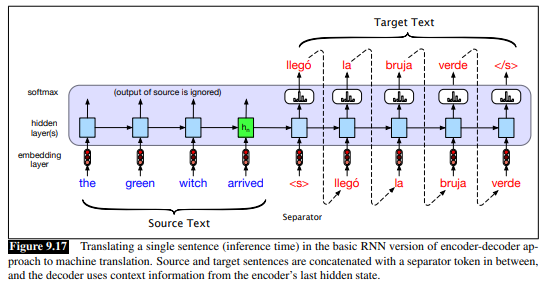

&nbsp;

$ŷ = argmax_{w∈|V|}*P(w|y_1,y_2,....,X)$

Unfortunetely, I have no prior experience with building sequence-to-sequence models so instead of coding I will [link](https://www.tensorflow.org/text/tutorials/nmt_with_attention) to an example published by TensorFlow and pass this section.